<a href="https://colab.research.google.com/github/ahmdbnrsl/Machine-Learning/blob/main/Mathematics-Requirements/Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALCULUS AND OPTIMIZATION**

**1. Extrema**

"Much of machine learning is about minimizing a cost function"
=> Banyak aspek dalam machine learning itu intinya adalah meminimalkan fungsi biaya.
Maksudnya, kita ingin model kita belajar dari data sedemikian rupa agar kesalahan prediksinya sekecil mungkin.
"(also called an objective function in the optimization community)"
=> Di kalangan orang-orang yang fokus pada bidang optimasi matematis, cost function juga dikenal dengan nama objective function.
Jadi dua istilah ini mirip, cuma beda konteks:

ML → cost/loss function

Optimization → objective function

"which is a scalar function of several variables"
=> Fungsi ini menghasilkan nilai skalar (misalnya: 0.25, 17.8, dst),
dan nilai itu tergantung pada banyak variabel (misalnya: bobot model, bias, dll).
Jadi secara matematis, bentuknya kayak:

$J(\theta_1, \theta_2, \dots, \theta_n) \in \mathbb{R}$

"that typically measures how poorly our model fits the data we have."
=> Nilai dari cost function ini menunjukkan seberapa buruk model kita mempelajari data.
Semakin tinggi nilainya → semakin jelek model kita.
Jadi target kita? Minimalkan nilai ini.

contoh soal :

tentukan nilai minima dan maxima dari : $f(x) = -x^3 + 3x^2 + 9x + 2$

langkah-langkah :

1. Turunkan fungsi terlebih dahulu

$f'(x) = -3x^2 + 6x$

2. Cari titik kritis (Critical Point) : $f'(x) = 0$

cari $x$ atau domain yang memenuhi persamaan $-3x^2 + 6x = 0$

maka ketemulah $-1, 3$

3. Turunkan fungsi lagi $f''(x)$

$f''(x) = -6x + 6$

4. Subtitusikan critical points ke $f''(x)$

$f''(-1) = -6(-1) + 6 = 12, > 0$ maka ini adalah nilai minimum

$f''(3) = -6(3) + 6 = -12, < 0$ maka ini adalah nilai maksimum

5. Subtitusikan Critical points ke $f(x)$

$f(-1) = -1(-1)^3 + 3(-1)^2 + 9(-1) + 2 = -3$

$f(3) = -3^3 + 3(3)^2 + 9(3) + 2 = 29$

nilai minimanya adalah : $(-1, -3)$

nilai maximanya adalah : $(3, 29)$

In [ ]:
import sympy as sp

x = sp.symbols('x')

f = -x**3 + 3*(x**2) + 9*x + 2

# turunan 1
f_1 = sp.diff(f, x)

# critical point
eq = sp.Eq(f_1, 0)
critical_point = sp.solve(eq, x)

# turunan 2
f_2 = sp.diff(f_1)

# subtitusi critical point ke f''(x)
min_max = []
for i in critical_point:
    min_max.append(f_2.subs({x : i}))

# subtitusi critical point ke f(x)
locale_min_max = []
for i in critical_point:
    locale_min_max.append(f.subs({x : i}))

critical_point, min_max, locale_min_max

([-1, 3], [12, -12], [-3, 29])

**Local maxima dan minima pada fungsi multi variable**

contoh : cari titik maximum minimum dari $f(x, y) = x^3 + y^3 - 3xy$

langkah-langkah :

cari turunan parsial pertama dari x, dan y

turunkan $f_x$ anggap $y$ sebagai konstanta

$f_x = 3x^2 - 3y$

turunkan $f_y$ anggap $x$ sebagai konstanta

$f_y = 3y^2 - 3x$

cari titik kritis, jika masih ada 2 variable, gunakan sistem persamaan

$f_x = 3x^2 - 3y$ => $x^2 = y$

$f_y = 3y^2 - 3x$ => $y^2 = x$

maka satu-satunya solusi adalah 0, dan 1, untuk $x, y$

cari $f_xx$ dan $f_yy$

$f_xx = 6x$

$f_yy = 6y$

cari $f_xy$

$f_xy = -3$

cari diskriminan $D = f_xx.f_yy - (f_xy)^2$

$D = (6x)(6y) - (-3)^2$

subtitusi titik kritis ke $f_xx$ dan $f_yy$

- titik kritis $(1, 1)$

$D = (6)(6) - (-3)^2 = 27$ Local Minimum

- titik kritis $(0, 0)$

$D = 0 - (-3)^2 = -9$ => Saddle Point

Subtitusi titik kritis ke $f(x, y)$

- titik kritis (1, 1)

$f(1, 1) = 1^3 + 1^3 - 3(1)(1) = -1$ =>  $(1, 1, -1)$

Local Minimum : $-1$

- titik kritis (0, 0)

$f(0, 0) = 0$ => $(0, 0, 0)$

Saddle Point : $0$

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

def f_1(x, y):
    return x**3 + y**3 - 3*x*y

# turunan pertama f(x) dan f(y)
f_x = sp.diff(f_1(x, y), (x))
f_y = sp.diff(f_1(x, y), (y))

# titik kritis x dan y
critical_points = sp.solve([f_x, f_y], (x, y))

# turunan kedua
f_xx = sp.diff(f_x, x)
f_yy = sp.diff(f_y, y)

# turunan x terhadap y
f_xy = sp.diff(f_x, y)

# Diskriminant
D = f_xx * f_yy - f_xy**2

results = []
for i, j in critical_points:
    print("Diskriminant :", sp.factor(D.subs({x: i, y: j})))
    print("Subtitusi f(x, y) :", sp.factor(f_1(x, y).subs({x:i, y:j})))

Diskriminant : -9
Subtitusi f(x, y) : 0
Diskriminant : 27
Subtitusi f(x, y) : -1
Diskriminant : 27
Subtitusi f(x, y) : -I*(sqrt(3) - I)**3/8
Diskriminant : 27
Subtitusi f(x, y) : I*(sqrt(3) + I)**3/8


**2. Gradients**

Gradients itu bisa dibilang turnan versi multi variable input misal : $f(x_1, X_2, x_3, \cdots, x_n) \Rightarrow \mathbb{R}$, gradien dari fungsi itu adalah vektor yang isinya semua partial derivative dari fungsi itu terhadap masing-masing variable input:

$\nabla f = \begin{bmatrix}
\frac{df}{dx_1} \\
\vdots \\
\frac{df}{dx_n}
\end{bmatrix}$

atau disingkat : $[\nabla f]_i = \frac{df}{dx_i}$

langkah-langkah mencari gardients

misal : $f(x, y) = 2x^2y + 3x^2 - 4y$

vektor arah : $\begin{bmatrix}
2\\
-4
\end{bmatrix}$

1. lakukan trurunan parsial terhadap $x$ dan $y$

- turunan parsial terhadap $x$, anggap $y$ sebagai konstanta.

$f'_x = 4xy + 6x$

- turunan parsial terhadap $y$, anggap $x$ sebagai konstanta.

$f'_y = 2x^2 - 4$

2. tulis gradient nya

$\nabla f = \begin{bmatrix}
4xy + 6x \\
2x^2 - 4
\end{bmatrix}$

3. Evaluasi pada titik tertentu (Opsional)

Misalkan kita ingin tahu gradien di titik $(x, y) = (3, 4)$

$\nabla f(3, 4) = \nabla f = \begin{bmatrix}
4(3)(4) + 6(3) \\
2(3)^2 - 4
\end{bmatrix} = \begin{bmatrix}
66 \\
14
\end{bmatrix}$

4. Tentukan arah tercepat (jika dalam bentuk vektor satuan bisa di normalkan saja vektor gradientnya)

Arah peningkatan fungsi selalu searah dengan vektor gradien:

Arah tercepat : $\nabla f(3, 4) = \begin{bmatrix}66\\14\end{bmatrix}$

lalu kita normalkan :

$|\nabla f| = \sqrt{66^2 + 14^2} = \sqrt{4356 + 196} = \sqrt{4552} \approx 67.468$

$u = \frac{1}{\sqrt{4552}} \begin{bmatrix} 66\\14\end{bmatrix}$

5. laju perubahan ke fungsi arah tertentu

Gunakan rumus : $\text{Directional Derivative} = \nabla f \cdot \hat{v}$

Dimana $\nabla f = \begin{bmatrix}66\\14\end{bmatrix}$

$\text{v} = \begin{bmatrix}2\\-4\end{bmatrix}$

$|\text{v}| = \sqrt{2^2 + -4^2} = \sqrt{20}$

$\hat{\text{v}} = \frac{1}{\sqrt{20}} \begin{bmatrix}2\\-4\end{bmatrix}$

Hitung : $\nabla f \cdot \hat{v} = 66 \cdot \frac{2}{\sqrt{20}} + 14 \cdot \frac{-4}{\sqrt{20}} = \frac{76}{\sqrt{20}}$

Jadi :

$\nabla f(3, 4) = \begin{bmatrix}
66 \\
14
\end{bmatrix}$

$\begin{bmatrix}
66 \\
14
\end{bmatrix} \text{atau} \frac{1}{\sqrt{4552}} \begin{bmatrix} 66\\14\end{bmatrix}$

$\frac{76}{\sqrt{20}}$

Contoh cepat pada fungsi 3 variable

$f(x, y, z) = 6x^2 + xyz - 4z^2, \text{v} = \begin{bmatrix}7\\3\\-2\end{bmatrix}$

$f_x = 12x + yz$

$f_y = xz$

$f_z = xy - 8z$

$\nabla f = \begin{bmatrix}
12x + yz\\
xz\\
xy - 8z
\end{bmatrix}$

Evaluasi $x = 9, y = -8, z = 2$

$\nabla f(9, -8, 2) = \begin{bmatrix}
12(9) + (-8)(2)\\
(9)(2)\\
(9)(-8) - 8(2)
\end{bmatrix} = \begin{bmatrix}
92\\
18\\
88
\end{bmatrix}$

$|\nabla f(9, -8, 2)| = \sqrt{92^2 + 18^2 + 88^2} = \sqrt{8464 + 324 + 7744} = \sqrt{16532} \approx 128.576$

$\hat{v} = \frac{1}{\sqrt{16532}}\begin{bmatrix}92\\18\\88\end{bmatrix}$

$|\text{v}| = \sqrt{7^2 + 3^2 + -2^2} = \sqrt{49 + 9 + 4} = \sqrt{62}$

$\hat{\text{v}} = \frac{1}{\sqrt{62}} \begin{bmatrix}7\\3\\-2\end{bmatrix}$

$\nabla f \cdot \hat{v} = 92 \cdot \frac{7}{\sqrt{62}} + 18 \cdot \frac{3}{\sqrt{62}} + 88 \cdot \frac{-2}{\sqrt{62}} = \frac{437\sqrt{62}}{31}$

In [ ]:
import sympy as sp;

x, y, z = sp.symbols('x y z');
f = 6*(x**2) + x*y*z - 4*(z**2);
v = sp.Matrix([7, 3, -2]);

# turunan parsial terhadap x
f_x = sp.diff(f, x);

# turunan parsial terhadap y
f_y = sp.diff(f, y);

# turunan parsial terhadap z
f_z = sp.diff(f, z);

# tulis gradients nya
grad = sp.Matrix([f_x, f_y, f_z]);

# Evaluasi di titik tertentu
evaluate = grad.subs({x : 9, y : -8, z : 2});

# Interpretasi
print(evaluate, '''Arah naik tercepat (steepest ascent)''', -evaluate, '''arah turun tercepat (steepest decsent)''')

# Arah tercepat (vektor satuan)
# tentukan norm dari gardient
norm = evaluate.norm()
grad_hat = evaluate / norm

# laju perubahan ke fungsi arah tertentu
# tentukan norm dari v
norm_v = v.norm()
v_hat = v / norm_v
directional_derivative = evaluate.dot(v_hat)
directional_derivative

Matrix([[92], [18], [-88]]) Arah naik tercepat (steepest ascent) Matrix([[-92], [-18], [88]]) arah turun tercepat (steepest decsent)


437*sqrt(62)/31

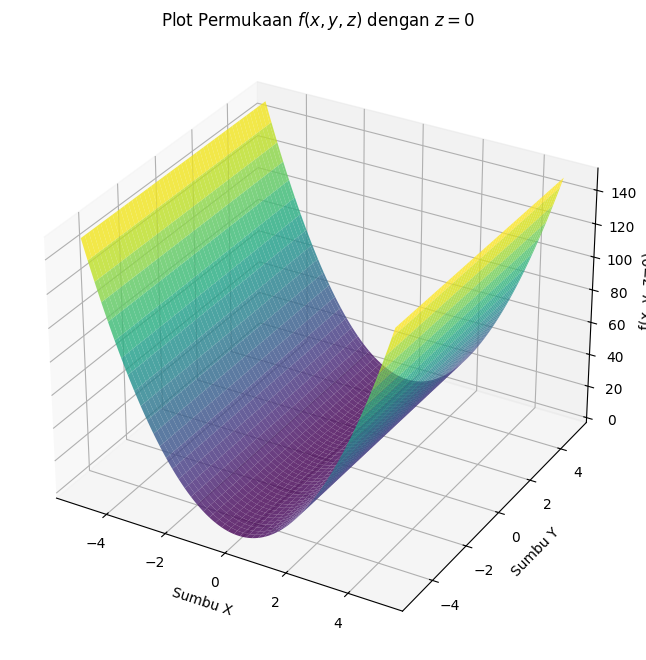

In [ ]:
# Visualisasi gradients

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f_numeric = sp.lambdify((x, y, z), f, 'numpy')

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z_fixed = 0
F_slice = f_numeric(X, Y, Z_fixed)

ax1.plot_surface(X, Y, F_slice, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Sumbu X')
ax1.set_ylabel('Sumbu Y')
ax1.set_zlabel(f'f(x, y, z={Z_fixed})')
ax1.set_title(f'Plot Permukaan $f(x, y, z)$ dengan $z={Z_fixed}$')
plt.show()


**3. The Jacobian**

Jacobian adalah matrix yang baris-baris nya adalah vektor-vektor Gradient dari hasil fungsi vektor

contoh

$\vec{f}(w, x, y, z) = \begin{bmatrix}f_1(w, x, y, z) = w^3z + xy^2\\f_2(w, x, y, z) = e^{3z} - cos(wxy^2)\end{bmatrix}$

langkah-langkah:

Turunkan parsial satu persatu fungsi

fungsi 1

$f'_{1w} = \frac{df_1}{dw}\left(w^3z + xy^2\right) = 3w^2z$

$f'_{1x} = \frac{df_1}{dx}\left(w^3z + xy^2\right) = y^2$

$f'_{1y} = \frac{df_1}{dy}\left(w^3z + xy^2\right) = 2xy$

$f'_{1z} = \frac{df_1}{dz}\left(w^3z + xy^2\right) = w^3$

$\nabla f_1 = \begin{bmatrix}3w^2z\\y^2\\2xy\\w^3\end{bmatrix}$

fungsi 2

$f'_{2w} = \frac{df_2}{dw}\left(e^{3z} - cos(wxy^2)\right) = xy^2\ sin(wxy^2)$

$f'_{2x} = \frac{df_2}{dx}\left(e^{3z} - cos(wxy^2)\right) = wy^2\ sin (wxy^2)$

$f'_{2y} = \frac{df_2}{dy}\left(e^{3z} - cos(wxy^2)\right) = 2wxy\ sin (wxy^2)$

$f'_{2z} = \frac{df_2}{dz}\left(e^{3z} - cos(wxy^2)\right) = 3e^{3z}$

$\nabla f_2 = \begin{bmatrix} xy^2\ sin(wxy^2)\\ wy^2\ sin (wxy^2)\\2wxy\ sin (wxy^2)\\3e^{3z}\end{bmatrix}$

jadikan vektor-vektor gradient menjadi matrix

$J\vec{f} = \begin{bmatrix} 3w^2z,\ y^2,\ 2xy,\ w^3\\xy^2\ sin(wxy^2),\ wy^2\ sin (wxy^2),\ 2wxy\ sin (wxy^2),\ 3e^{3z}\end{bmatrix}$

In [ ]:
import sympy as sp

w, x, y, z = sp.symbols('w x y z')

def f(w, x, y, z):
  return sp.Matrix([
      w**3*z + x*y**2,
      sp.exp(3*z) - sp.cos(w*x*y**2)
  ])

# turunan parsial f1
f1_w = sp.diff(f(w, x, y, z)[0], w)
f1_x = sp.diff(f(w, x, y, z)[0], x)
f1_y = sp.diff(f(w, x, y, z)[0], y)
f1_z = sp.diff(f(w, x, y, z)[0], z)

grad_f1 = sp.Matrix([f1_w, f1_x, f1_y, f1_z])

# turunan parsial f2
f2_w = sp.diff(f(w, x, y, z)[1], w)
f2_x = sp.diff(f(w, x, y, z)[1], x)
f2_y = sp.diff(f(w, x, y, z)[1], y)
f2_z = sp.diff(f(w, x, y, z)[1], z)

grad_f2 = sp.Matrix([f2_w, f2_x, f2_y, f2_z])

# gabungkan menjadi matrix
J = sp.Matrix([grad_f1.transpose(), grad_f2.transpose()])
J

Matrix([
[            3*w**2*z,                 y**2,                 2*x*y,       w**3],
[x*y**2*sin(w*x*y**2), w*y**2*sin(w*x*y**2), 2*w*x*y*sin(w*x*y**2), 3*exp(3*z)]])

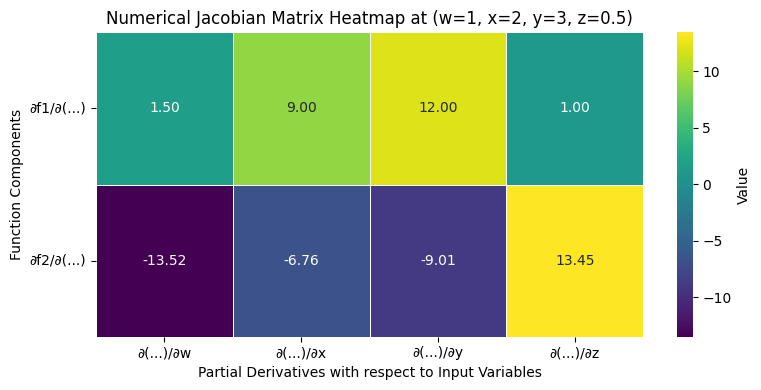

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

point = {w: 1, x: 2, y: 3, z: 0.5}

J_numerical = J.subs(point)

J_numpy = np.array(J_numerical).astype(np.float64)

plt.figure(figsize=(8, 4))
sns.heatmap(
    J_numpy,
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Value'}
)

plt.yticks([0.5, 1.5], ['∂f1/∂(...)', '∂f2/∂(...)'], rotation=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['∂(...)/∂w', '∂(...)/∂x', '∂(...)/∂y', '∂(...)/∂z'])

plt.title('Numerical Jacobian Matrix Heatmap at (w=1, x=2, y=3, z=0.5)')
plt.xlabel('Partial Derivatives with respect to Input Variables')
plt.ylabel('Function Components')
plt.tight_layout()
plt.show()

**Intuisi geometris Jacobian**

a. Jika $|\text{det}(\text{J})| = 2 \rightarrow$ luas membesar 2 kali.

b. Jika $|\text{det}(\text{J})| = 0.5 \rightarrow$ luas mengecil $\frac{1}{2}$

c. Jika $\text{det}(\text{J}) < 0 \rightarrow$ ada pembalikan orientasi (dibalik/diputar)

**Jacobian untuk perubahan variable di Integral**

Rumus umum: $$\iint_R f(x, y) dx\ dy = \iint_{R'} f(x(u, v), y(u, v)) \cdot \left|\frac{d(x, y)}{d(u, v)}\right|\ du\ dv$$

---

1. Contoh Soal :

$$\iint_{R}(x^2 + y^2)\ dx\ dy$$

dengan $R$ adalah daerah segiempat yang dibatasi oleh garis

- $x +y = 1$
- $x+y = 2$
- $x-y = 1$
- $x-y = 2$

Gunakan perubahan variable $u = x+y,\ v = x-y$

---
(1.)
Langkah-langkah:

Ubah batas-batas variable tersebut ke dalam variable $u$ dan $v$ karena semua batas sudah berupa $x + y$ dan $x - y$, maka langsung kita ubah:

- $x +y = 1 \Rightarrow u = 1$
- $x+y = 2 \Rightarrow u = 2$
- $x-y = 1 \Rightarrow v = 1$
- $x-y = 2 \Rightarrow v = 2$


maka daerah baru $R$ dalam variable $u$ dan $v$ adalah persegi panjang:

$1 \le u \le 2, 1 \le v \le 2$

$u + v = 2x \rightarrow x = \frac{u + v}{2}$

$u - v = 2y \rightarrow y = \frac{u - v}{2}$

Ubah fungsi $f(x, y) = x^2 + y^2 = \left(\frac{u+v}{2}\right)^2 + \left(\frac{u-v}{2}\right)^2 = \frac{(u + v)^2 + (u - v)^2}{4} = \frac{u^2 + 2uv + v^2 + u^2 - 2uv + v^2}{4} = \frac{2u^2 + 2v^2}{4} = \frac{2(u^2 + v^2)}{4} = \frac{u^2 + v^2}{2} = \frac{1}{2} (u^2 + v^2)$

Hitung Jacobiannya:

$J = \begin{bmatrix}\frac{d(x, y)}{d(u, v)}\end{bmatrix}$

$J = \begin{bmatrix}\frac{dx}{du}\ \frac{dx}{dv}\\ \frac{dy}{du}\ \frac{dy}{dv}\end{bmatrix} = \begin{bmatrix}\frac{1}{2}\ \frac{1}{2}\\ \frac{1}{2}\ -\frac{1}{2}\end{bmatrix}$

$det(J) = \left(\frac{1}{2} \cdot -\frac{1}{2} \right) - \left(\frac{1}{2} \cdot \frac{1}{2} \right) = -\frac{2}{4} = -\frac{1}{2}$

Ambil nilai mutlaknya $\rightarrow \left|-\frac{1}{2}\right| = \frac{1}{2}$

Susun integral baru:

$$\iint_R(x^2 + y^2)\ dx\ dy = \iint_{R'} \frac{1}{2}(u^2 + v^2)\ \cdot \frac{1}{2}\ du\ dv =\ \frac{1}{4}\iint_{R'}(u^2 + v^2)\ du\ dv$$

Pisah integral:

$\frac{1}{4}\begin{bmatrix}\iint_{R'}u^2\ du\ dv\ + \iint_{R'}v^2\ du\ dv\end{bmatrix}$

Kerjakan satu persatu:

1. $$\int_{u=1}^{2} u^2\ du = \begin{bmatrix}\frac{u^3}{3}\end{bmatrix}_1^2 = \frac{2^3}{3} - \frac{1^3}{3} = \frac{7}{3}$$

$$\int_{v=1}^{2}\left(\frac{7}{3}\right) dv =\frac{7}{3}(2 - 1) = \frac{7}{3}$$

2. $$\int_{v=1}^{2} v^2\ dv = \begin{bmatrix}\frac{v^3}{3}\end{bmatrix}_1^2 = \frac{2^3}{3} - \frac{1^3}{3} = \frac{7}{3}$$

$$\int_{u=1}^{2}\left(\frac{7}{3}\right) du =\frac{7}{3}(2 - 1) = \frac{7}{3}$$

$\rightarrow \frac{1}{4}\ \cdot \left(\frac{7}{3} + \frac{7}{3}\right) = \frac{1}{4}\ \cdot \frac{14}{3} = \frac{14}{12}$

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

f = 1/4 * (x**2 + y**2)

sp.integrate(f, (x, 1, 2), (y, 1, 2))

1.16666666666667

**4. The Hessian**

Mirip seperti Jacobian, Hessian adalah matrix yang berisi trurunan parsial, hanya saja, hessian berisi turunan parsian ke 2

Contoh pada fungsi 3 variable

$f(x, y, z) = 4x^2yz + xy^3z + 5xz$

maka Hessiannya adalah:

$H_f(x, y, z) = \begin{bmatrix}f_{xx}\ f_{xy}\ f_{xz}\\f_{yx}\ f_{yy}\ f_{yz}\\f_{zx}\ f_{zy}\ f_{zz}\end{bmatrix}$

1. Cari $f_x$

$f_x = 8xyz + y^3z + 5z$

$f_{xx} = 8yz$

$f_{xy} = 8xz + 3y^2z$

$f_{xz} = 8xy + y^3 + 5$

2. Cari $f_y$

$f_y = 4x^2z + 3y^2xz$

$f_{yx} = 8xz + 3y^2z$

$f_{yy} = 6xyz$

$f_{yz} = 4x^2 + 3y^2x$

3. Cari $f_z$

$f_z = 4x^2y + xy^3 + 5x$

$f_{zx} = 8xy + y^3 + 5$

$f_{zy} = 4x^2 + 3y^2x$

$f_{zz} = 0$


Bentuk Matrix nya:

$J_f(x, y, z) = \begin{bmatrix}8yz,\ 8xz + 3y^2z,\ 8xy + y^3 + 5\\8xz + 3y^2z,\ 6xyz,\ 4x^2 + 3y^2x\\ 8xy + y^3 + 5,\ 4x^2 + 3y^2x,\ 0\end{bmatrix}$

matrix hessian akan membentuk matrix simetris

In [ ]:
import sympy as sp

x, y, z = sp.symbols('x y z')

f = 4*x**2*y*z + x*y**3*z + 5*x*z

matrix = []

for i in [x, y, z]:
  f_p = sp.diff(f, i)
  row = []
  for j in [x, y, z]:
    f_pp = sp.diff(f_p, j)
    row.append(f_pp)
  matrix.append(row)

# cek simetris
sp.Matrix(matrix).equals(sp.Matrix(matrix).transpose())

True

**5. Matrix Calculus**

Matrix Calculus adalah perluasan dari kalkulus biasa (diferensial dan gradien) ke fungsi-fungsi yang melibatkan vektor dan matriks

Rumus dasar:

$\nabla_x(a^Tx) = a\\
\nabla_x(x^TAx) = (A + A^T)x\\
A = A^T \rightarrow\ 2Ax$

dimana:

$x$ adalah vektor kolom, yang berisi variable,

contoh: $\begin{bmatrix} x_1\\x_2\end{bmatrix}$

$a$ adalah vektor konstan

contoh: $\begin{bmatrix}4\\-2\end{bmatrix}$

$A$ adalah matriks

contoh: $\begin{bmatrix}1 & 3\\3 & 1\end{bmatrix}$

Contoh Soal (1):

$f(x) = x^TAx$

dengan $x = \begin{bmatrix}x_1\\x_2\end{bmatrix}$ dengan $A = \begin{bmatrix}5 & 4\\4 & 5\end{bmatrix}$

Untuk mencari gradien kita gunakan rumus: $\nabla_x(x^TAx) = (A + A^T)x$

Jika $A$ simetris maka cukup gunakan $2Ax$

kita cek apakah $A$ adalah matriks simetris $\rightarrow\ A = A^T$

$A = \begin{bmatrix}5 & 4\\4 & 5\end{bmatrix}\ A^T = \begin{bmatrix}5 & 4\\4 & 5\end{bmatrix}\ \rightarrow$ maka simetris

jadi langsung saja gunakan rumus $2Ax$

$2\ \cdot \begin{bmatrix}5 & 4\\4 & 5\end{bmatrix}\ \cdot \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}10 & 8\\8 & 10\end{bmatrix}\ \cdot \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}10x_1 + 8x_2\\8x_1 + 10x_2\end{bmatrix}$

Hasil Akhirnya adalah $\rightarrow \begin{bmatrix}10x_1 + 8x_2\\8x_1 + 10x_2\end{bmatrix}$

Contoh Soal (2):

$f(x) = a^Tx$

dengan $a = \begin{bmatrix}85\\-43\end{bmatrix}\ x = \begin{bmatrix}x_1\\x_2\end{bmatrix}$

Pahami bentuk fungsinya $\rightarrow$ berbentuk perkalian vektor

kita tau bahwa $a^Tx = a$

kita coba buktikan $\rightarrow\ \begin{bmatrix}85 & 43\end{bmatrix}\ \cdot \begin{bmatrix}x_1\\x_2\end{bmatrix} = 85x_1 - 43x_2$

Lalu kita cari turunan terhadap x untuk membentuk gradien $\rightarrow \frac{d}{dx} (85x_1 - 43x_2) = 85 - 43 \rightarrow \begin{bmatrix}85\\-43\end{bmatrix}$

In [ ]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')
A = sp.Matrix([
    [5, 4],
    [1, 0]
])
x = sp.Matrix([[x1], [x2]])
# cek apakah A simetris
if A.equals(A.transpose()):
  f = 2 * A * x
else:
  f = (A + A.transpose()) * x

f

Matrix([
[10*x1 + 5*x2],
[        5*x1]])

In [ ]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')
a = sp.Matrix([85, -43])
x = sp.Matrix([x1, x2])
f = a.dot(x)
grad = sp.Matrix([sp.diff(f, x1), sp.diff(f, x2)])
# cek a^T . x = a
grad.equals(a)

True

Contoh Soal (3):

Bentuk $f(X) = Tr(X^TAX)$

turunannya adalah: $\frac{∂f}{∂X}(AX + A^TX) = (A+A^T)X$

dimana $A = \begin{bmatrix}3 & 1\\1 & 2\end{bmatrix}, X = \begin{bmatrix}X_1 & X_2\\X_3 & X_4\end{bmatrix}$

Jika $A$ simetris $(A = A^T)$ maka hasilnya akan $2AX$

Karena $A$ simetris maka langsung saja gunakan rumus $2AX$

$\nabla_X f(X) = 2\ \cdot \begin{bmatrix}3 & 1\\1 & 2\end{bmatrix}\ \cdot \begin{bmatrix}x_1 & x_2\\x_3 & x_4\end{bmatrix} = \begin{bmatrix}6 & 2\\2 & 4\end{bmatrix}\ \cdot \begin{bmatrix}x_1 & x_2\\x_3 & x_4\end{bmatrix} = \begin{bmatrix}6x_1 + 2x_3 & 6x_2 + 2x_4\\2x_1 + 4x_3 & 2x_2 + 4x_4\end{bmatrix}$

In [8]:
# validasi rumus 2AX
import sympy as sp

x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')
A = sp.Matrix([
    [3, 1],
    [1, 2]
])
X = sp.Matrix([
    [x1, x2],
    [x3, x4]
])

f = sp.trace(X.transpose() * A * X)
grad = sp.Matrix([[sp.diff(f, x1), sp.diff(f, x2)], [sp.diff(f, x3), sp.diff(f, x4)]])
grad

Matrix([
[6*x1 + 2*x3, 6*x2 + 2*x4],
[2*x1 + 4*x3, 2*x2 + 4*x4]])

In [9]:
2 * A * X

Matrix([
[6*x1 + 2*x3, 6*x2 + 2*x4],
[2*x1 + 4*x3, 2*x2 + 4*x4]])

Contoh Soal (4):

Bentuk $log\ det(X)$

dengan $X = \begin{bmatrix}x_1 & x_2\\x_2 & x_4\end{bmatrix}$

Jika $X$ adalah matrix simetris maka turunannya adalah invers dari $X\ (X^{-1})$

dimana $X^{-1} = \frac{1}{det(X)}\ \cdot adj(X)$

maka dari soal diatas kita bisa hitung dengan cara rumus invers dari $X$

kita cari dulu determinan dari $X \rightarrow x_1x_4 - x_2^2$ anggap saja ini sebagai $D$

- turunan terhadap $x_1 \rightarrow \frac{∂f}{∂x_1} = \frac{1}{D} \cdot x_4$
- turunan terhadap $x_2 \rightarrow \frac{∂f}{∂x_2} = \frac{1}{D} \cdot -2x_2$
- turunan terhadap $x_4 \rightarrow \frac{∂f}{∂x_4} = \frac{1}{D} \cdot x_1$

lalu kita subtitusikan ke rumus $\rightarrow \frac{1}{D} \cdot \begin{bmatrix}x_4 & -x_2\\-x_2 & x_1\end{bmatrix}$

In [22]:
import sympy as sp

x1, x2, x4 = sp.symbols('x1 x2 x4')

X = sp.Matrix([
    [x1, x2],
    [x2, x4]
])

X.inverse_ADJ()

Matrix([
[ x4/(x1*x4 - x2**2), -x2/(x1*x4 - x2**2)],
[-x2/(x1*x4 - x2**2),  x1/(x1*x4 - x2**2)]])

_[note.1]_

turunan parsial terhadap determinan matrix jika determinan matrix $= ad - bc$ maka turunan parsial terhadap $a$ adalah $d$, dan jika turunan parsial terhadap $a$ dari $log(det(A))$ adalah $\frac{1}{D} \cdot d$.